# Disclaimer about my data

- NORTH KOREA and SOUTH KOREA have yet to be untangled, which is why their counts are artificially low
- "catkey" column is our local record number
- country codes and regions come from this dataset : https://www.kaggle.com/petersorensen360/iso3166countrieswithregionalcodes


# Import Packages I need

In [108]:
import numpy as np
import pandas as pd
import matplotlib as plt

# Set up the Data

In [39]:
# create a dataframe from my csv 
# define datatype = string for all columns (won't need to do any math with the numbers)
df_final = pd.read_csv('NASIG_final.csv', dtype='str', header=0)

In [40]:
# check column names for df_final dataframe
for col in df_final.columns:
    print(col)

catkey
geoname
country
name
alpha-2
alpha-3
country-code
iso_3166-2
region
sub-region
intermediate-region
region-code
sub-region-code
intermediate-region-code


In [77]:
# look at the first 20 rows of the dataframe
# confirm that the NULL values came over as null (they did)
df_final.head(20)

,catkey,geoname,country,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,11,Maritime Provinces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26,United States,United States of America,United States of America,US,USA,840,ISO 3166-2:US,Americas,Northern America,NaN,19,21,NaN
2,26,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,198,United States,United States of America,United States of America,US,USA,840,ISO 3166-2:US,Americas,Northern America,NaN,19,21,NaN
4,214,Canada,Canada,Canada,CA,CAN,124,ISO 3166-2:CA,Americas,Northern America,NaN,19,21,NaN
5,214,Canada,Canada,Canada,CA,CAN,124,ISO 3166-2:CA,Americas,Northern America,NaN,19,21,NaN
6,215,Canada,Canada,Canada,CA,CAN,124,ISO 3166-2:CA,Americas,Northern America,NaN,19,21,NaN
7,215,Canada,Canada,Canada,CA,CAN,124,ISO 3166-2:CA,Americas,Northern America,NaN,19,21,NaN
8,216,Canada,Canada,Canada,CA,CAN,124,ISO 3166-2:CA,Americas,Northern America,NaN,19,21,NaN
9,216,Canada,Canada,Canada,CA,CAN,124,ISO 3166-2:CA,Americas,Northern America,NaN,19,21,NaN


# START ANSWERING QUESTIONS!

## Which countries occur most / least frequently?

In [42]:
# count the total number of times each country occurs
# use 'df_final['country'].value_counts()[:50]' if you want to see only the top 50 , etc.
df_final['country'].value_counts()

United States of America                                256733
United Kingdom of Great Britain and Northern Ireland    187177
China                                                   159162
France                                                  108229
Japan                                                    88043
                                                         ...  
Cocos (Keeling) Islands                                      3
North Korea                                                  3
Saint Barthélemy                                             2
Sint Maarten (Dutch part)                                    1
São Tomé and Príncipe                                        1
Name: country, Length: 248, dtype: int64

## Which countries are best / worst represented when measuring by titles?

In [86]:
# create a new dataframe with the count of unique catkeys for each country 
# (in other words, how many bibs total contain a subject from each country)
df_uni_countries = df_final.groupby('country')['catkey'].nunique()
print(df_uni_countries)

country
Afghanistan              6364
Albania                   852
Alger                    5238
American Samoa             69
Andorra                    71
                         ... 
Virgin Islands (U.S.)     217
Wallis and Futuna          19
Yemen                    1822
Zambia                    534
Zimbabwe                  956
Name: catkey, Length: 248, dtype: int64


In [96]:
# order by catkey column (which should actually be called "count_unique_catkey")
df_uni_countries = df_final.groupby('country')['catkey'].nunique().reset_index().sort_values("catkey", ascending=False)
print(df_uni_countries)

                                               country  catkey
235                           United States of America  199129
234  United Kingdom of Great Britain and Northern I...  139479
44                                               China  103723
72                                              France   78315
39                                              Canada   63058
..                                                 ...     ...
161                                        North Korea       3
45                             Cocos (Keeling) Islands       3
183                                   Saint Barthélemy       2
199                          Sint Maarten (Dutch part)       1
216                              São Tomé and Príncipe       1

[248 rows x 2 columns]


In [85]:
# create my final dataframe which has the count in order and the column name changed to "count_unique_catkey"
df_uni_countries = df_final.groupby('country')['catkey'].nunique().reset_index().sort_values("catkey", ascending=False)
df_unicon_final = df_uni_countries.rename(columns={"country": "country", "catkey": "count_unique_catkey"})
print(df_unicon_final)

                                               country  count_unique_catkey
235                           United States of America               199129
234  United Kingdom of Great Britain and Northern I...               139479
44                                               China               103723
72                                              France                78315
39                                              Canada                63058
..                                                 ...                  ...
161                                        North Korea                    3
45                             Cocos (Keeling) Islands                    3
183                                   Saint Barthélemy                    2
199                          Sint Maarten (Dutch part)                    1
216                              São Tomé and Príncipe                    1

[248 rows x 2 columns]


## Which regions occur most / least frequently?

In [88]:
# count the total number of times each region occurs
# reminder - column names are "region" , "sub-region" , "intermediate-region"
df_final['region'].value_counts()

Europe      831770
Americas    505309
Asia        487142
Africa       91705
Oceania      17374
Name: region, dtype: int64

In [89]:
df_final['sub-region'].value_counts()

Northern America                   340624
Eastern Asia                       259869
Northern Europe                    230682
Western Europe                     223448
Southern Europe                    197004
Eastern Europe                     180636
Latin America and the Caribbean    164685
Western Asia                       102558
Southern Asia                       99948
Sub-Saharan Africa                  51658
Northern Africa                     40047
South-eastern Asia                  20513
Australia and New Zealand           12731
Central Asia                         4254
Melanesia                            2589
Micronesia                           1088
Polynesia                             966
Name: sub-region, dtype: int64

In [90]:
df_final['intermediate-region'].value_counts()

South America      97353
Central America    42778
Caribbean          24554
Western Africa     15956
Eastern Africa     15580
Southern Africa    12045
Middle Africa       8077
Channel Islands      176
Name: intermediate-region, dtype: int64

## Which regions are best / worst represented when measuring by titles? 

In [95]:
# create a new dataframe with the count of unique catkeys for each region 
# (in other words, how many bibs total contain a subject from each region)
# order by catkey column (which should actually be called "count_unique_catkey")
df_uni_regions = df_final.groupby('region')['catkey'].nunique().reset_index().sort_values("catkey", ascending=False)
print(df_uni_regions)

     region  catkey
3    Europe  569055
1  Americas  357815
2      Asia  313151
0    Africa   60057
4   Oceania   12529


In [98]:
# create my final dataframe which has the count in order and the column name changed to "count_unique_catkey"
df_uni_regions = df_final.groupby('region')['catkey'].nunique().reset_index().sort_values("catkey", ascending=False)
df_unireg_final = df_uni_regions.rename(columns={"region": "region", "catkey": "count_unique_catkey"})
print(df_unireg_final)

     region  count_unique_catkey
3    Europe               569055
1  Americas               357815
2      Asia               313151
0    Africa                60057
4   Oceania                12529


In [102]:
# create a new dataframe with the count of unique catkeys for each sub-region 
# (in other words, how many bibs total contain a subject from each sub-region )
# order by catkey column (which should actually be called "count_unique_catkey")
df_uni_subregions = df_final.groupby('sub-region')['catkey'].nunique().reset_index().sort_values("catkey", ascending=False)
print(df_uni_subregions)

                         sub-region  catkey
8                  Northern America  256299
9                   Northern Europe  168070
2                      Eastern Asia  166883
16                   Western Europe  158495
13                  Southern Europe  137297
3                    Eastern Europe  121393
4   Latin America and the Caribbean  106404
15                     Western Asia   66942
12                    Southern Asia   66143
14               Sub-Saharan Africa   33992
7                   Northern Africa   26842
11               South-eastern Asia   13615
0         Australia and New Zealand    9427
1                      Central Asia    2746
5                         Melanesia    1847
10                        Polynesia     706
6                        Micronesia     683


In [104]:
# create my final dataframe which has the count in order and the column name changed to "count_unique_catkey"
df_uni_subregions = df_final.groupby('sub-region')['catkey'].nunique().reset_index().sort_values("catkey", ascending=False)
df_unisubreg_final = df_uni_subregions.rename(columns={"sub-region": "sub-region", "catkey": "count_unique_catkey"})
print(df_unisubreg_final)

                         sub-region  count_unique_catkey
8                  Northern America               256299
9                   Northern Europe               168070
2                      Eastern Asia               166883
16                   Western Europe               158495
13                  Southern Europe               137297
3                    Eastern Europe               121393
4   Latin America and the Caribbean               106404
15                     Western Asia                66942
12                    Southern Asia                66143
14               Sub-Saharan Africa                33992
7                   Northern Africa                26842
11               South-eastern Asia                13615
0         Australia and New Zealand                 9427
1                      Central Asia                 2746
5                         Melanesia                 1847
10                        Polynesia                  706
6                        Micron

In [105]:
# create a new dataframe with the count of unique catkeys for each sub-region 
# (in other words, how many bibs total contain a subject from each sub-region )
# order by catkey column (which should actually be called "count_unique_catkey")
df_uni_intregions = df_final.groupby('intermediate-region')['catkey'].nunique().reset_index().sort_values("catkey", ascending=False)
print(df_uni_intregions)

  intermediate-region  catkey
5       South America   64031
1     Central America   27431
0           Caribbean   15739
7      Western Africa   10677
3      Eastern Africa   10166
6     Southern Africa    8135
4       Middle Africa    5476
2     Channel Islands     139


In [106]:
# create my final dataframe which has the count in order and the column name changed to "count_unique_catkey"
df_uni_intregions = df_final.groupby('intermediate-region')['catkey'].nunique().reset_index().sort_values("catkey", ascending=False)
df_uniintreg_final = df_uni_intregions.rename(columns={"intermediate-region": "intermediate-region", "catkey": "count_unique_catkey"})
print(df_uniintreg_final)

  intermediate-region  count_unique_catkey
5       South America                64031
1     Central America                27431
0           Caribbean                15739
7      Western Africa                10677
3      Eastern Africa                10166
6     Southern Africa                 8135
4       Middle Africa                 5476
2     Channel Islands                  139


## Which countries had the most / least distinct 650$a 's?

In [172]:
# create a new dataframe that contains the count of the unique subject heading for each country

grouped_651_df = df_final.groupby("country")
grouped_651_df_agg = grouped_651_df.agg({"geoname": "nunique"}).sort_values("geoname", ascending=False)
grouped_651_df_reorder = grouped_651_df_agg.reset_index().rename(columns={"country": "country", "geoname": "count_unique_651"})
print(grouped_651_df_reorder)

                                               country  count_unique_651
0                                                China              5032
1    United Kingdom of Great Britain and Northern I...              4733
2                                               France              3190
3                                                Spain              3034
4                                                Italy              2980
..                                                 ...               ...
243                           Turks and Caicos Islands                 2
244                                        South Korea                 2
245                                           Bermuda.                 1
246                              São Tomé and Príncipe                 1
247                          Sint Maarten (Dutch part)                 1

[248 rows x 2 columns]


In [175]:
print(grouped_651_df_reorder.to_string())

                                               country  count_unique_651
0                                                China              5032
1    United Kingdom of Great Britain and Northern I...              4733
2                                               France              3190
3                                                Spain              3034
4                                                Italy              2980
5                                              Germany              2895
6                                                Japan              2155
7                                               Poland              1823
8                                                India              1801
9                                   Multiple_Countries              1756
10                                  Russian Federation              1549
11                                              Mexico              1302
12                                    Historical_Pl

# Visually communicate findings 

### Reminder of the df names:
df_final - entire dataset
df_unicon_final - count of unique catkeys for each country 
df_unireg_final - count of unique catkeys for each region  
df_unisubreg_final - count of unique catkeys for each sub-region  
df_uniintreg_final - count of unique catkeys for each intermediate-region  

### Didn't declare a df yet, but could
df_final['country'].value_counts() - count the total number of times each country occurs
df_final['region'].value_counts() - count the total number of times each region occurs
df_final['sub-region'].value_counts() - count the total number of times each sub-region occurs
df_final['intermediate-region'].value_counts() - count the total number of times each intermediate-region occurs

Text(0.5, 1.0, 'Count of unique catkeys for top 10 countries')

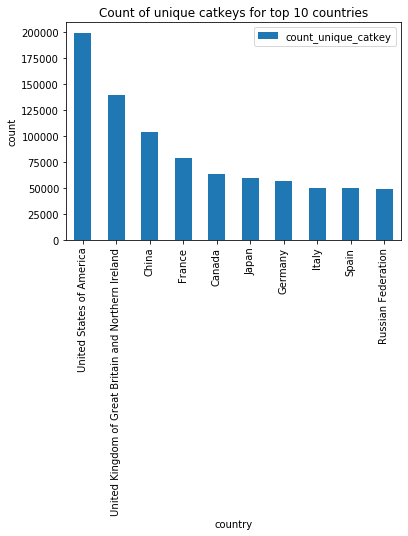

In [131]:
ax = df_unicon_final.head(10).plot.bar(x='country')
ax.set_xlabel("country")
ax.set_ylabel('count')
ax.set_title('Count of unique catkeys for top 10 countries')

Text(0.5, 1.0, 'Count of unique catkeys for lowest 10 countries')

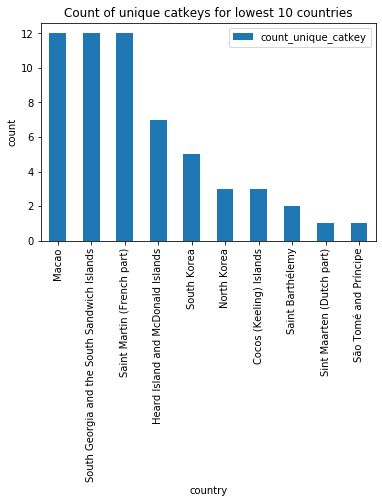

In [132]:
ax = df_unicon_final.tail(10).plot.bar(x='country')
ax.set_xlabel("country")
ax.set_ylabel('count')
ax.set_title('Count of unique catkeys for lowest 10 countries')

Text(0.5, 1.0, 'Count of unique catkeys for each region')

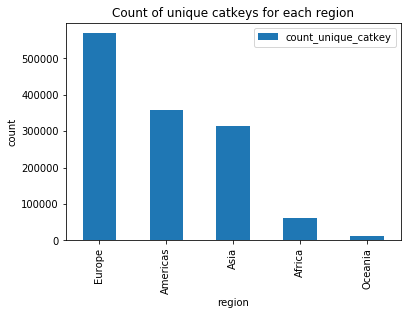

In [116]:
ax = df_unireg_final.plot.bar(x='region')
ax.set_xlabel("region")
ax.set_ylabel('count')
ax.set_title('Count of unique catkeys for each region')

Text(0.5, 1.0, 'Count of unique catkeys for each sub-region')

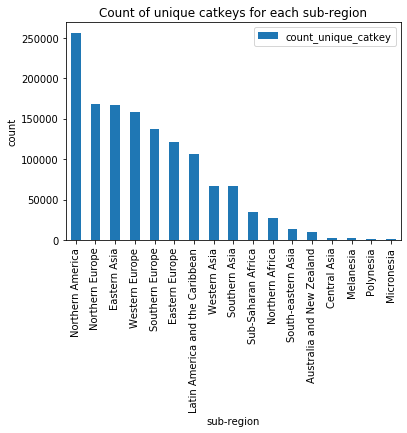

In [117]:
ax = df_unisubreg_final.plot.bar(x='sub-region')
ax.set_xlabel("sub-region")
ax.set_ylabel('count')
ax.set_title('Count of unique catkeys for each sub-region')

Text(0.5, 1.0, 'Count of unique catkeys for each intermediate-region')

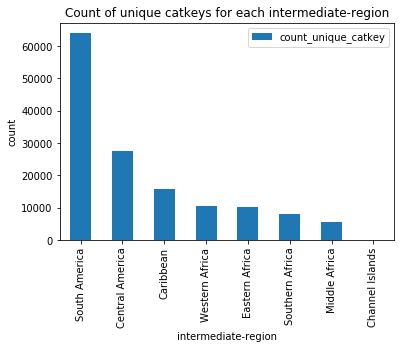

In [118]:
ax = df_uniintreg_final.plot.bar(x='intermediate-region')
ax.set_xlabel("intermediate-region")
ax.set_ylabel('count')
ax.set_title('Count of unique catkeys for each intermediate-region')

Text(0.5, 1.0, 'Count of total occurences for each country')

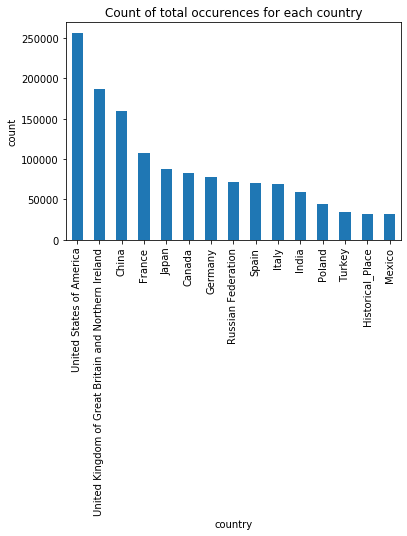

In [129]:
df_totalcountries = df_final['country'].value_counts().head(15)
ax = df_totalcountries.plot.bar(x='country')
ax.set_xlabel("country")
ax.set_ylabel('count')
ax.set_title('Count of total occurences for each country')

Text(0.5, 1.0, 'Count of total catkeys for each country')

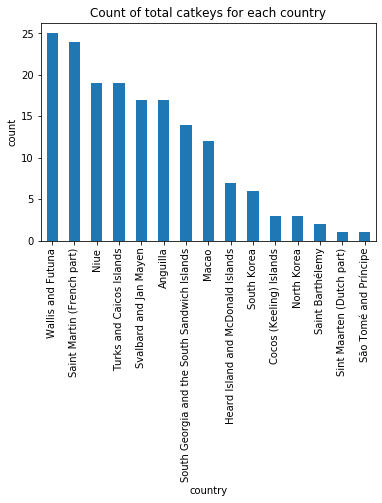

In [130]:
df_totalcountries = df_final['country'].value_counts().tail(15)
ax = df_totalcountries.plot.bar(x='country')
ax.set_xlabel("country")
ax.set_ylabel('count')
ax.set_title('Count of total catkeys for each country')

Text(0.5, 1.0, 'Count of total catkeys for each region')

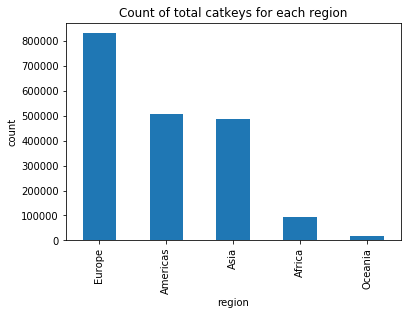

In [133]:
df_totalregion = df_final['region'].value_counts()
ax = df_totalregion.plot.bar(x='region')
ax.set_xlabel("region")
ax.set_ylabel('count')
ax.set_title('Count of total catkeys for each region')

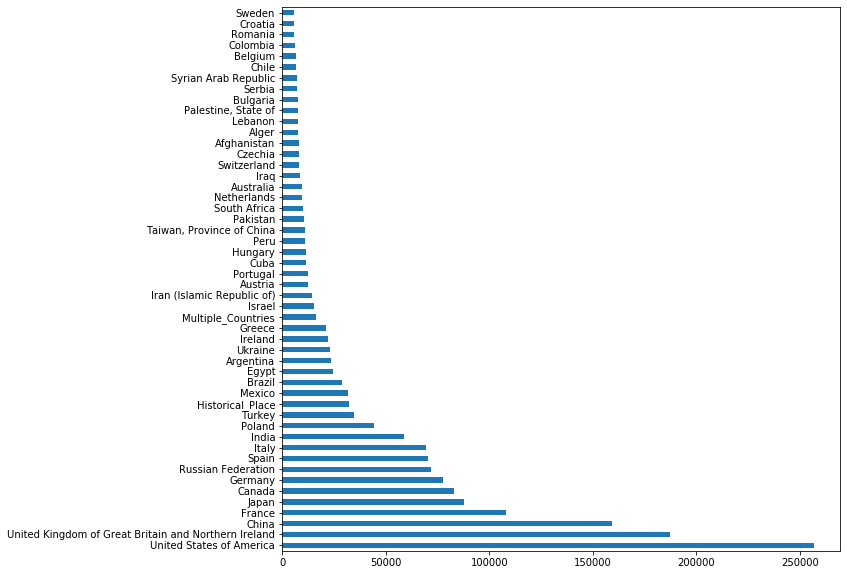

In [139]:
df_final['country'].value_counts()[:50].plot(kind='barh', figsize = (10,10))